# Introduction to Convolutional Neural Network (CNN) PART II
> Explains the basics, motivation, and working of a CNN which is used for image recognition tasks.
- toc: true 
- badges: true
- comments: true

## Introduction
In the first part we discussed about the fundamentals of a CNN model. We learnt how the convolution layer detect various patterns present in the input image. The later convolution layers detect more complex patterns, and so we generally keep on increasing the number of channels as we move to more deeper layers. In this post, we will train a NN and CNN on the MNIST dataset, and will compare the results.

In [100]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Lets load the MNIST dataset in to a dataloader.

(ImageBlock(cls=PILImageBW), CategoryBlock) Tells the input is an image, and output will be one category per input image. There are total 10 categories (0-9). 

In [101]:
path = untar_data(URLs.MNIST)

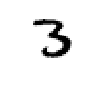

In [71]:
im3 = Image.open(path/'training'/'3'/'12.png')
show_image(im3)

In [103]:
mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  get_y=parent_label)

dls = mnist.dataloaders(path/'training')
xb,yb = first(dls.valid)
xb.shape, yb.shape

((64, 1, 28, 28), (64,))

Batch-size is taken as default value 64, the input image is of dimension $1\times 28 \times 28$. 

In [106]:
print(f'Total mini-batches in training dataset are {len(dls.train)}')
print(f'Total mini-batches in validation dataset are {len(dls.valid)}')

Total mini-batches in training dataset are 750
Total mini-batches in validation dataset are 188


In [104]:
print(f'Total classes = {dls.c}')

Total classes = 10


**Convolutional Block**:
I have defined a function *block()* which takes 3 parameters exaplained as follows:
1. **ni**: This is the number of channels in the input image.
1. **nf**: This is total number of filters, or number of channels in the output image.
1. **stride**: It is the value of stride, default 2, which will be used while convolving filter on the input.

In [107]:
def block(ni, nf, stride=2):
    return ConvLayer(ni, nf, stride=stride)

**CNN Model:** The CNN model I have defined below continuously halves the input grid size by using a stride of two, and so it doubles the number of channels. After the fourth convolutional layer, the output is of size $4\times 4 \times 64$, on it, adaptiveAvgPool2d is applied. It converts the 2x2 grid into the desired shape (passed as 1, therefore it will convert 2x2 into 1x1). The output of this will be of shape $1\times 1\times 64$ which is flattened and put into an fc layer. 

**NN Model** A simple neural network model is also implemented which has 2 layers. 

def get_model():
    basic_cnn = nn.Sequential(
        block(1, 8),
        block(8, 16),
        block(16,32),
        block(32,64),
        nn.AdaptiveAvgPool2d(1),
        Flatten(),
        nn.Linear(64, 10)
    )
    return basic_cnn


def get_nn():
    basic_nn = nn.Sequential(
        nn.Flatten(),            
        nn.Linear(784, 512),
        nn.Linear(512, 10)
    )
    return basic_nn

Let's create a learner that we will use to train both the models.

In [164]:
def get_learner(model):
    return Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)


In [165]:
learn = get_learner(get_nn())

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.00363078061491251)

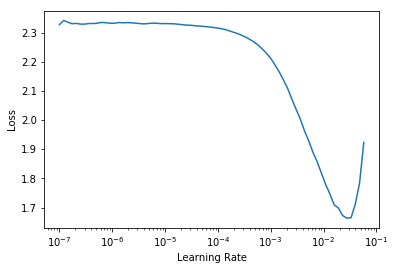

In [166]:
learn.lr_find()

Firstly we will train nn model for 10 epochs, at max learning rate of 2e-3.

In [167]:
learn.fit_one_cycle(10, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.343918,0.334851,0.903333,00:35
1,0.319538,0.352520,0.902667,00:37
2,0.339889,0.378988,0.897333,00:39
3,0.306681,0.351762,0.905000,00:39
4,0.284653,0.323651,0.910000,00:40
5,0.280786,0.322405,0.911750,00:41
6,0.254253,0.307338,0.919750,00:41
7,0.249282,0.295363,0.922333,00:39
8,0.246942,0.292607,0.924833,00:39
9,0.229630,0.292373,0.924583,00:40


The accuracy achieved by it is 0.925. Now we have seen results from a plain NN, let's try training a CNN and see the results.

In [168]:
learn = get_learner(get_model())

In [170]:
learn.fit_one_cycle(10, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.127602,0.141943,0.955500,00:39
1,0.104358,0.106248,0.968167,00:46
2,0.072060,0.087537,0.973250,00:45
3,0.063653,0.061928,0.983000,00:46
4,0.041726,0.052312,0.984083,00:44
5,0.037934,0.047995,0.986667,00:44
6,0.023682,0.039701,0.988583,00:49
7,0.009950,0.037383,0.989667,00:48
8,0.007573,0.035949,0.990667,00:47
9,0.003797,0.035787,0.990750,00:45


Nice, we have able to get an accuracy of 0.99 with a CNN, which is far better than a simple NN

Clearly, CNN is able to learn patterns of the images better than the plain NN. Also, the dataset is so simple that we are able to get more than 0.99 accuracy with a simple CNN. If the dataset is a complex one that this simple CNN will fail for sure. It will start overfitting, grads flow will be poor, and a lot of other issues. We will get to know more about this in the next and last part, and also we will see far more sophisticated architectures. Thanks.